In [1]:
import acquire
import env4
import prepare


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
from prepare import train_test_validate2

def wrangle_zillow():
    """
    Perform data wrangling on Zillow dataset:
    1. Query relevant columns from the database.
    2. Save the data to a CSV file.
    3. Read the CSV file into a DataFrame.
    4. Check for and handle null values.
    5. Split the data into train, test, train_val, and test_val sets.

    Returns:
    - tuple: (train, test, train_val, test_val)
    """

    # Step 1: Query relevant columns from the database
    zillow_query = """
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet,
           taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM propertylandusetype
    LEFT JOIN properties_2017 USING(propertylandusetypeid)
    WHERE propertylandusedesc = "Single Family Residential";
    """

    # Reading the data
    data = pd.read_sql(zillow_query, env4.get_db_url('zillow'))
    
    # Step 2: Save the data to a CSV file
    data.to_csv('zillow.csv')

    # Step 3: Read the CSV file into a DataFrame
    data = pd.read_csv('zillow.csv', index_col=0)

    # Step 4: Check for and handle null values
    data = data.dropna()
    
    #Turning floats into int

    make_ints = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'fips']

    for i in make_ints:
        data[i] = data[i].astype(int)
    

    # Step 5: Split the data into train, test, train_val, and test_val sets
    train, test, train_val, test_val = train_test_validate2(data)

    return train, test, train_val, test_val




In [4]:
# Example usage:
train, test, train_val, test_val = wrangle_zillow()

train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2093695,3,3.0,2612,897795,1952,10210.37,6037
236593,3,1.0,1014,347090,1950,5125.14,6037
119786,3,2.0,1319,320901,1951,4020.75,6037
391140,3,1.0,1210,391104,1952,4846.79,6037
1311872,3,1.0,962,265919,1954,3332.29,6037
...,...,...,...,...,...,...,...
1966409,6,7.0,5565,9150000,2013,102021.37,6037
1248304,3,2.0,1372,362874,1956,4537.35,6037
28216,3,2.0,1086,441633,1955,5210.70,6059
279546,3,3.0,2364,671412,1940,8106.06,6037


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_variable_pairs(df):
    """
    Plot all pairwise relationships along with the regression line for each pair.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - None (displays plots).
    """

    # Create a pair plot with regression lines
    sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'red'}}, corner=True)

    # Display the plots
    plt.show()



/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


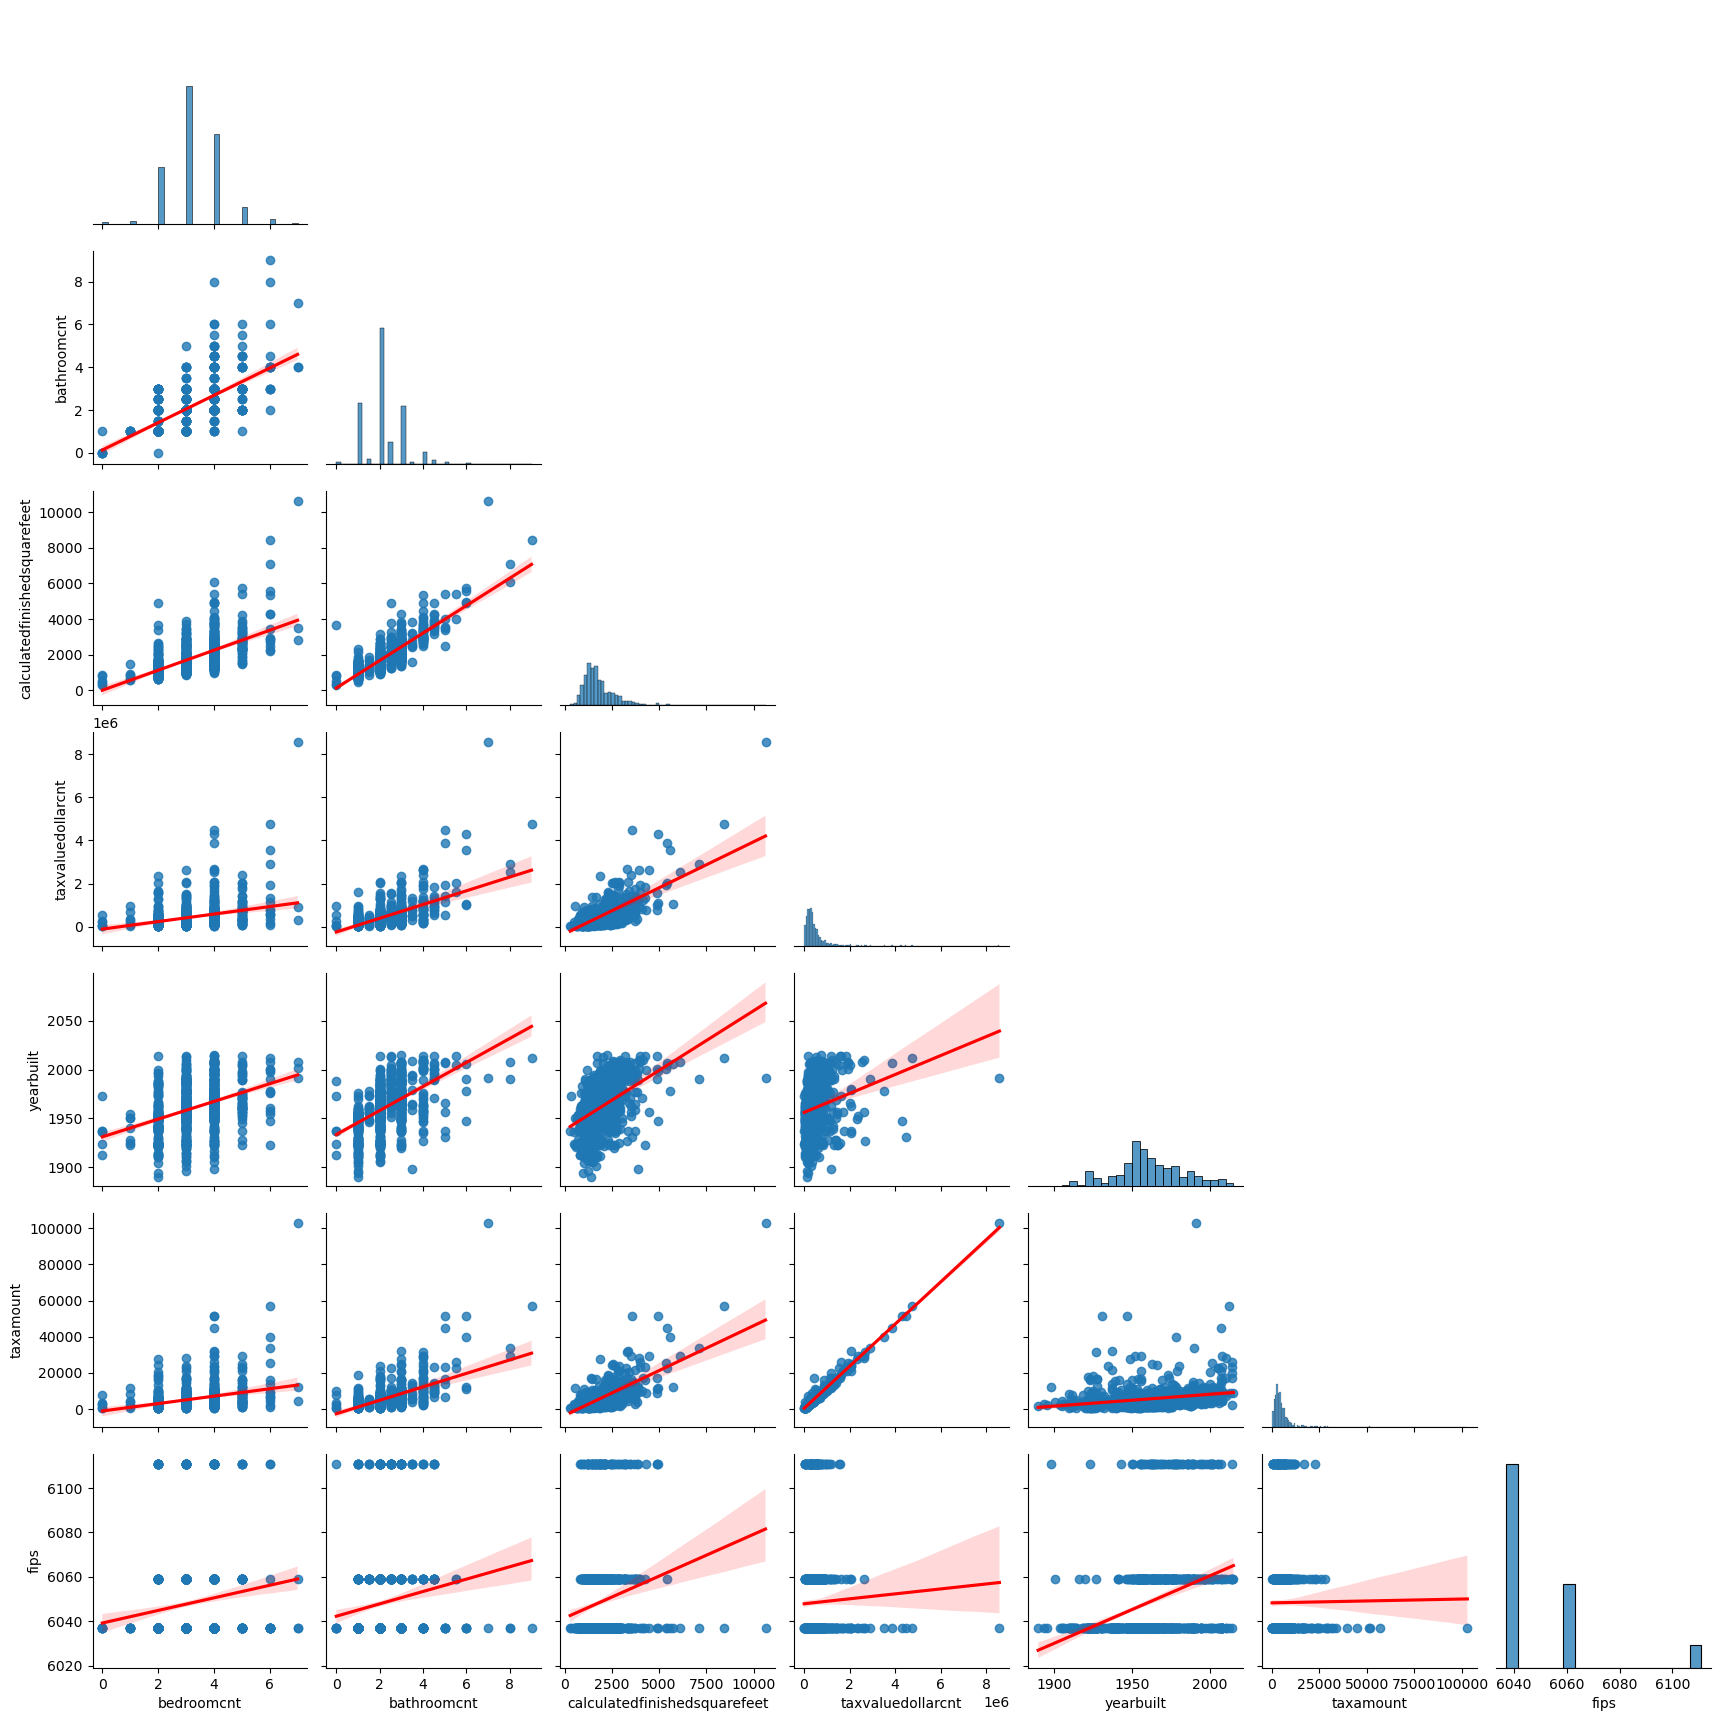

In [7]:
# Example usage:
plot_variable_pairs(train.sample(n=1000))


In [ ]:
#2. import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_and_continuous_vars(df, cat_columns, cont_columns):
    """
    Plot three different plots for visualizing the relationship between a categorical variable and a continuous variable.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - cat_columns (list): List of categorical column names.
    - cont_columns (list): List of continuous column names.

    Returns:
    - None (displays plots).
    """
    
    # Set the style for seaborn plots
    sns.set(style="whitegrid")

    # Loop through each categorical column
    for cat_col in cat_columns:

        # Loop through each continuous column
        for cont_col in cont_columns:

            # Create a box plot
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat_col, y=cont_col, data=df)
            plt.title(f'{cont_col} by {cat_col}')
            plt.show()

            # Create a violin plot
            plt.figure(figsize=(12, 6))
            sns.violinplot(x=cat_col, y=cont_col, data=df)
            plt.title(f'{cont_col} by {cat_col}')
            plt.show()

            # Create a swarm plot
            plt.figure(figsize=(12, 6))
            sns.swarmplot(x=cat_col, y=cont_col, data=df)
            plt.title(f'{cont_col} by {cat_col}')
            plt.show()

# Example usage:
plot_categorical_and_continuous_vars(your_dataframe, cat_columns, cont_columns)


In [10]:
cat_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

### 2. With Example

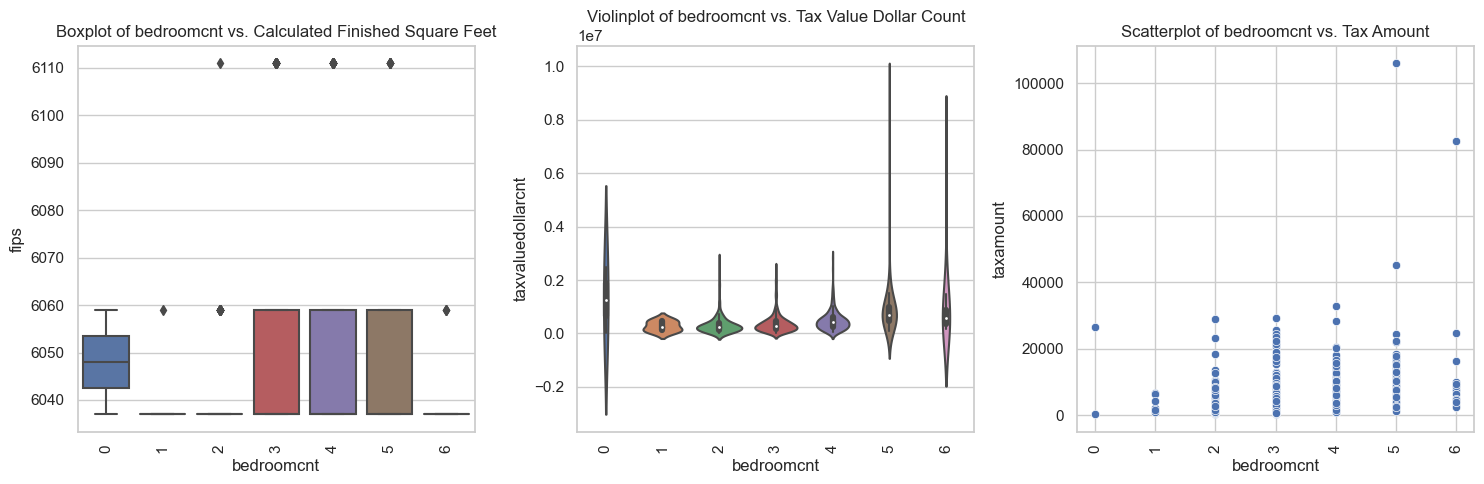

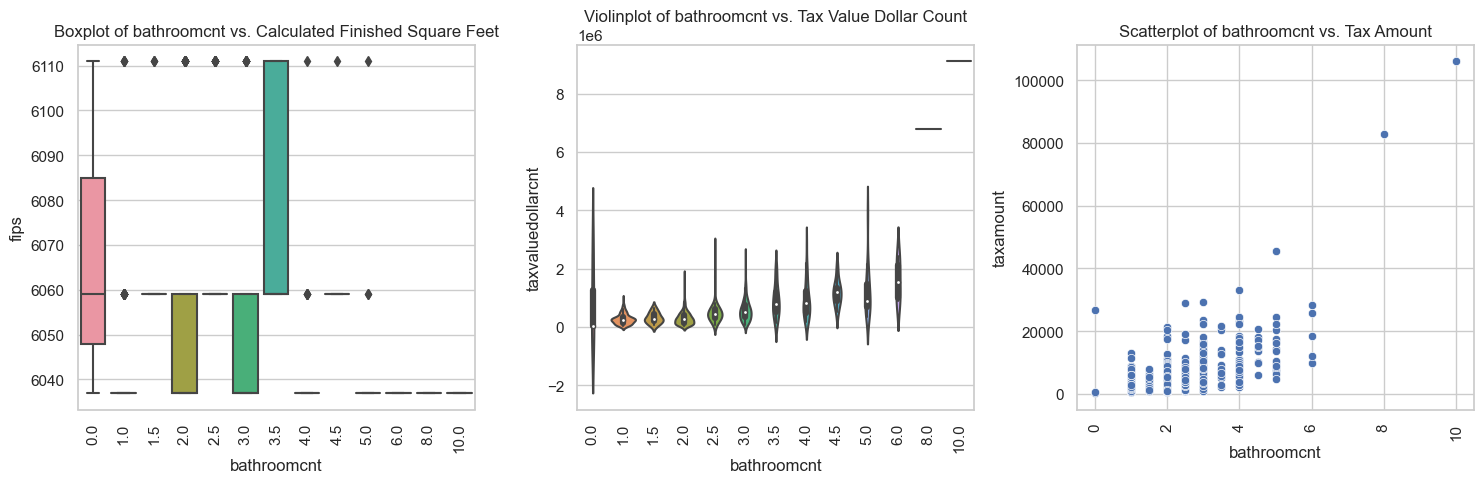

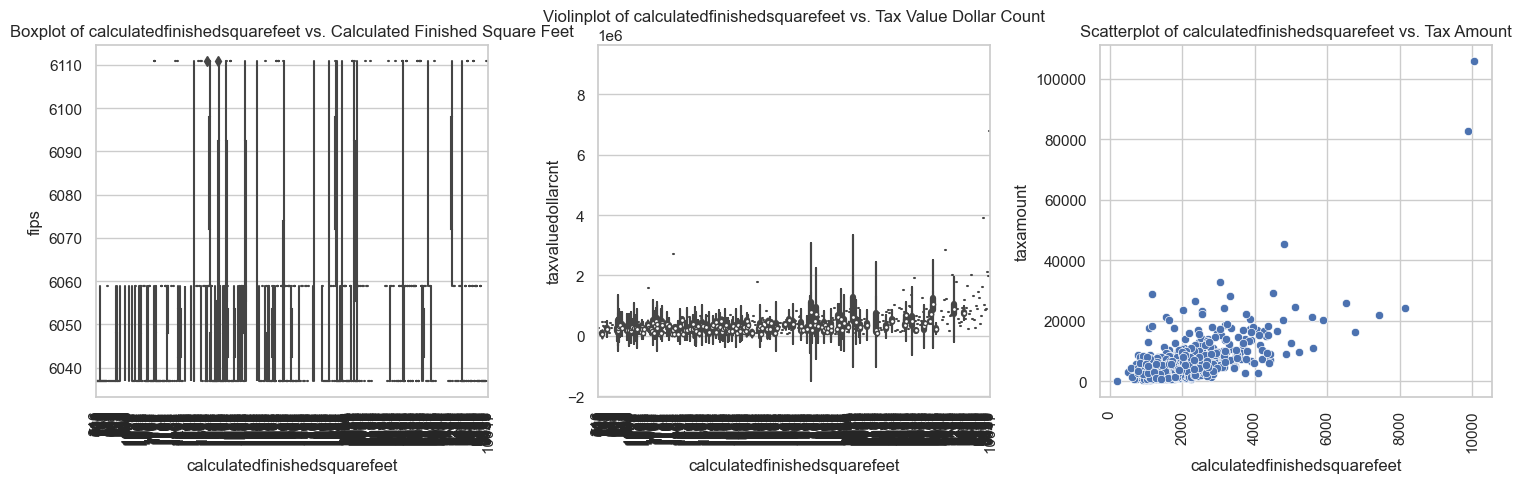

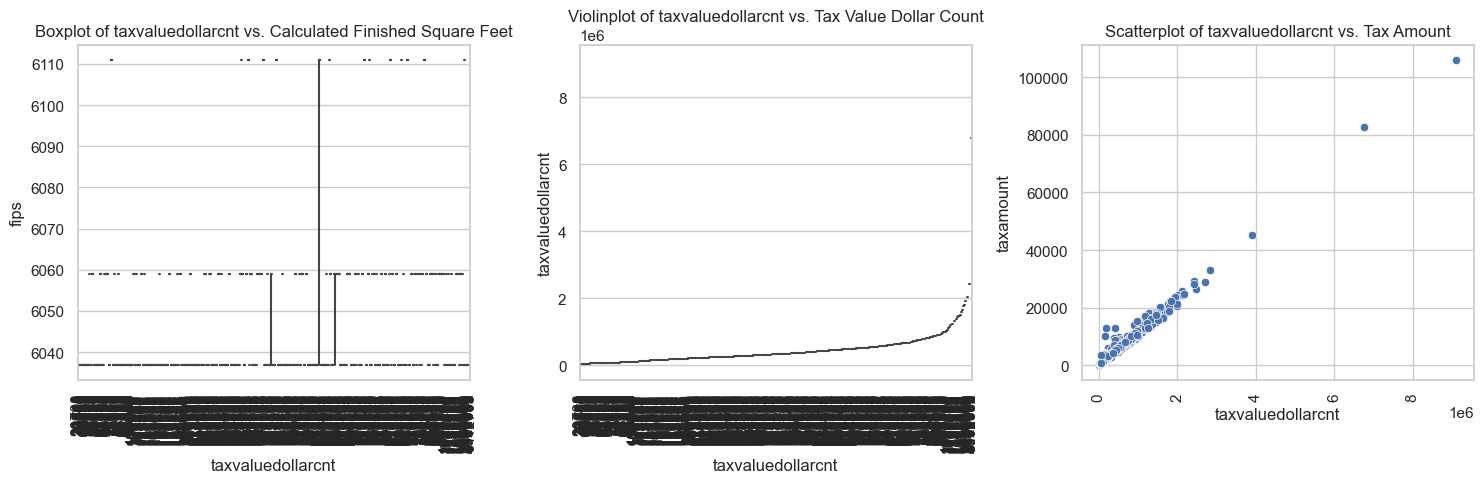

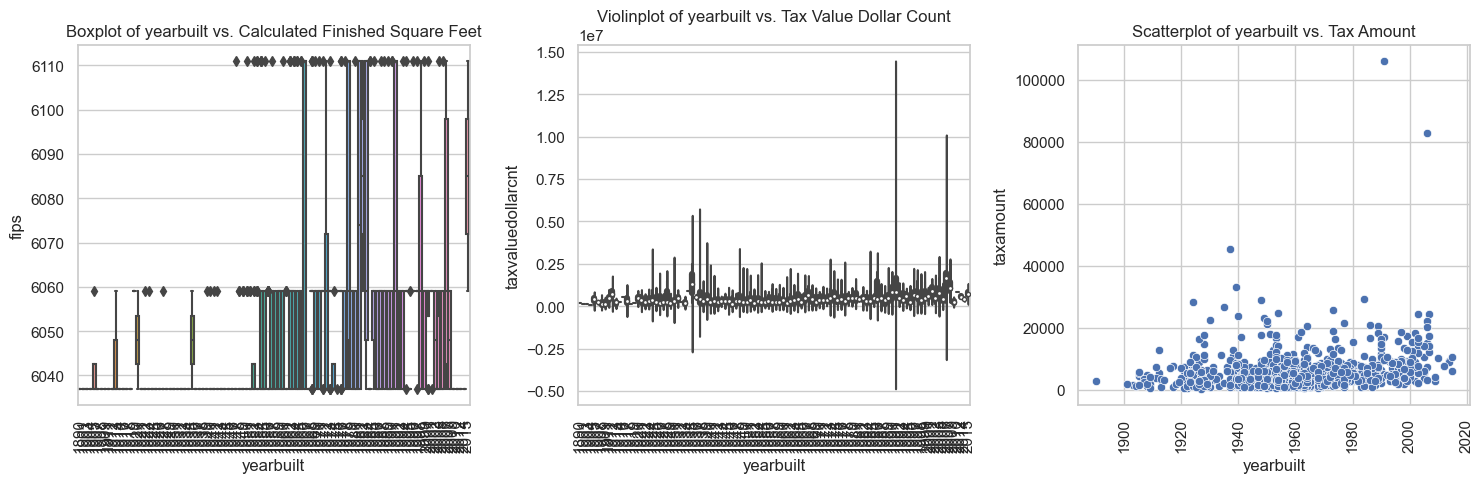

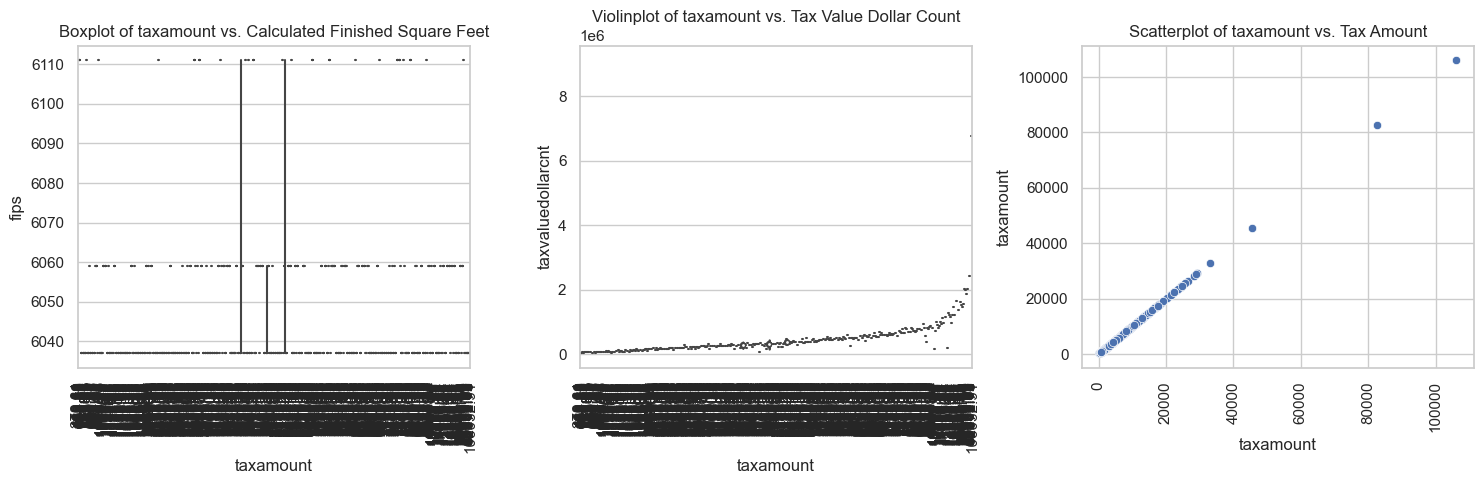

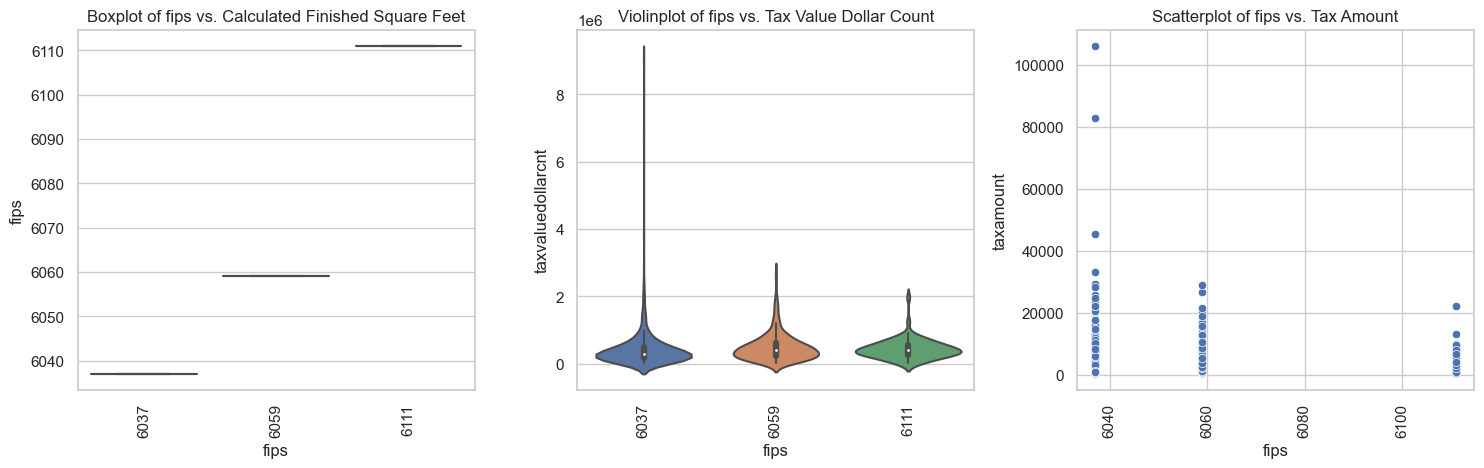

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vars(df, cat_columns):
    """
    Plot three different visualizations for each categorical variable with continuous variables.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - cat_columns (list): List of categorical column names.

    Returns:
    - None (displays plots).
    """

    # Set the style for seaborn plots
    sns.set(style="whitegrid")

    # Iterate through each categorical column
    for cat_column in cat_columns:

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

        # Plot 1: Boxplot
        sns.boxplot(x=cat_column, y='fips', data=df, ax=axes[0])
        axes[0].set_title(f'Boxplot of {cat_column} vs. Calculated Finished Square Feet')
        axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Plot 2: Violinplot
        sns.violinplot(x=cat_column, y='taxvaluedollarcnt', data=df, ax=axes[1])
        axes[1].set_title(f'Violinplot of {cat_column} vs. Tax Value Dollar Count')
        axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Plot 3: Scatterplot
        sns.scatterplot(x=cat_column, y='taxamount', data=df, ax=axes[2])
        axes[2].set_title(f'Scatterplot of {cat_column} vs. Tax Amount')
        axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Adjust layout
        plt.tight_layout()
        
        

        # Display the plots
        plt.show()

# Example usage:
plot_categorical_vars(train.sample(n=1000), cat_columns)

In [ ]:
# 3. Completed by making .py file

In [15]:
#4 - 8. 

# Can the year that the structure was built as well number of bathrooms or area size
#that the house has?


from scipy.stats import pearsonr

def perform_pearson_correlation_test(dataframe, variable1_name, variable2_name, alpha=0.05):
    """
    Perform a Pearson correlation test between two continuous variables.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame.
    - variable1_name (str): Name of the first continuous variable.
    - variable2_name (str): Name of the second continuous variable.
    - alpha (float): Significance level (default is 0.05).

    Returns:
    - tuple: Tuple containing the correlation coefficient and the p-value.
    - str: Result of the significance test.
    """

    # Extract the variables from the DataFrame
    variable1 = train['yearbuilt']
    variable2 = train['calculatedfinishedsquarefeet']

    # Perform Pearson correlation test
    correlation_coefficient, p_value = pearsonr(variable1, variable2)

    # Check if the p-value is less than alpha
    if p_value < alpha:
        result = f"There is a significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"
    else:
        result = f"There is no significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"

    return (correlation_coefficient, p_value), result

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame and 'variable1'/'variable2' are your column names
result, test_result = perform_pearson_correlation_test(train, 'variable1', 'variable2')

# Display the results
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"P-Value: {result[1]:.4f}")
print(test_result)


Correlation Coefficient: 0.3331
P-Value: 0.0000
There is a significant correlation (p-value: 0.0000, alpha: 0.05)


In [19]:



from scipy.stats import pearsonr

def perform_pearson_correlation_test(dataframe, variable1_name, variable2_name, alpha=0.05):
    """
    Perform a Pearson correlation test between two continuous variables.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame.
    - variable1_name (str): Name of the first continuous variable.
    - variable2_name (str): Name of the second continuous variable.
    - alpha (float): Significance level (default is 0.05).

    Returns:
    - tuple: Tuple containing the correlation coefficient and the p-value.
    - str: Result of the significance test.
    """

    # Extract the variables from the DataFrame
    variable1 = train['yearbuilt']
    variable2 = train['taxvaluedollarcnt']

    # Perform Pearson correlation test
    correlation_coefficient, p_value = pearsonr(variable1, variable2)

    # Check if the p-value is less than alpha
    if p_value < alpha:
        result = f"There is a significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"
    else:
        result = f"There is no significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"

    return (correlation_coefficient, p_value), result

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame and 'variable1'/'variable2' are your column names
result, test_result = perform_pearson_correlation_test(train, 'variable1', 'variable2')

# Display the results
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"P-Value: {result[1]:.4f}")
print(test_result)


Correlation Coefficient: 0.1919
P-Value: 0.0000
There is a significant correlation (p-value: 0.0000, alpha: 0.05)


Text(0.5, 1.0, 'Yearbuilt vs. Bathrm Cnt')

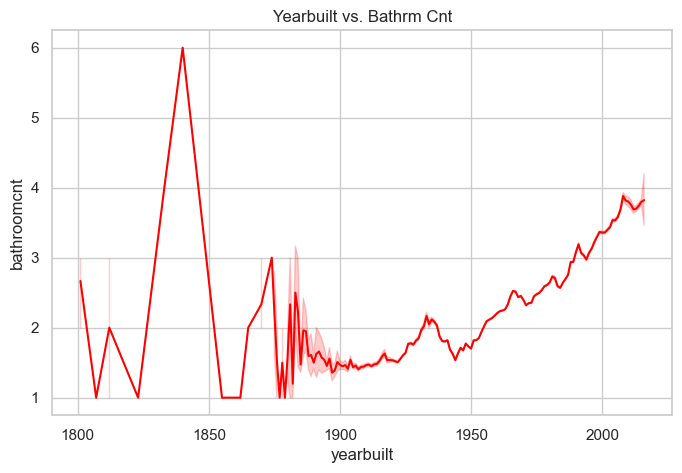

In [16]:
 # Plot 3: Scatterplot
plt.figure(figsize=(8,5))
sns.lineplot(x='yearbuilt', y='bathroomcnt', data=train, color='red')
plt.title(f'Yearbuilt vs. Bathrm Cnt')

#sns.lineplot(data=df, x='x_var', y='y_var', hue='group_var', palette=['red', 'blue'])


###  9. I feel that the 'year built' and the 'calculatedfinishedsquarefeet' aka area both correlated to value

### Findings

The investigation suggests that factors such as location, construction year, and the count of bathrooms influence the overall value of a property. Following statistical analysis to uncover potential correlations among these elements, it becomes evident that each factor independently contributes to the valuation of a house.